In [1]:
import numpy as np
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# 获取当前目录
current_dir = os.getcwd()  

# 添加 `interClusLib` 的上级目录到 Python 路径
sys.path.append(os.path.join(current_dir, ".."))

import interClusLib
from interClusLib.data_structure import IntervalData
from interClusLib.similarity_distance import IntervalMetrics
from interClusLib.interval_clustering import IntervalKMeans
from interClusLib.visualization import ClusteringVisualization as cvis

print("interClusLib Path:", interClusLib.__file__)

random_data = IntervalData.random_data(30, 3)
print("\n Random Interval Data:")
print(random_data.data)
random_data.summary()

interClusLib Path: /Users/jiashuchen/Desktop/InterClusLib/examples/../interClusLib/__init__.py

 Random Interval Data:
    feature_1_lower  feature_1_upper  feature_2_lower  feature_2_upper  \
0         35.806218        42.855984        32.498299        84.630937   
1         51.971588        59.382207        47.746444        66.396919   
2         56.164415        92.113124        75.734380        89.781554   
3         38.426362        55.843200        51.916356        82.407214   
4         50.308155        54.270714        11.942588        87.064901   
5         20.192681        38.269253         9.018237        98.437105   
6         26.751108        93.578034         0.827499        77.195310   
7          0.951741        34.425276        15.433552        90.763849   
8         47.628529        91.976536        16.157740        38.589280   
9          8.057418        41.153338        51.144513        60.197494   
10        44.592184        88.291484        42.909518        91.814

In [2]:
print(type(random_data))      
print(type(random_data.data))  
print(random_data.data.shape)  
print(random_data.get_intervals().shape[0])

<class 'interClusLib.data_structure.IntervalData'>
<class 'pandas.core.frame.DataFrame'>
(30, 6)
30


30
[[1.00000000e+00 1.19250149e-01 5.17693846e-02 4.41109718e-01
  2.31323363e-01 3.74892832e-01 2.67296824e-01 3.25402051e-01
  2.96514162e-02 1.09104016e-01 3.04507067e-01 4.15034191e-01
  2.46836784e-01 2.71486594e-01 2.71663406e-01 3.38937053e-01
  2.94965861e-01 1.19531505e-01 1.80567823e-01 2.30113814e-01
  4.21235716e-01 1.47428132e-01 1.48406245e-01 2.18584550e-01
  1.46985322e-01 2.41376581e-01 1.03356161e-01 2.72165730e-02
  6.14429147e-03 3.83091723e-01]
 [1.19250149e-01 1.00000000e+00 2.67203886e-02 2.00843527e-01
  2.36501418e-01 6.95247555e-02 1.18370592e-01 1.88826285e-01
  2.46765180e-01 1.61800732e-01 1.83646637e-01 1.73367164e-01
  2.64368223e-01 4.62687764e-02 8.31648981e-02 3.06900315e-01
  3.27810948e-01 1.88070695e-01 2.89846681e-01 1.93537951e-01
  1.41715168e-01 0.00000000e+00 4.63173229e-02 1.06869094e-01
  4.83657204e-01 8.63525796e-02 4.43982012e-02 2.85401384e-01
  1.43435769e-01 2.02987589e-01]
 [5.17693846e-02 2.67203886e-02 1.00000000e+00 5.87420075e-02
 

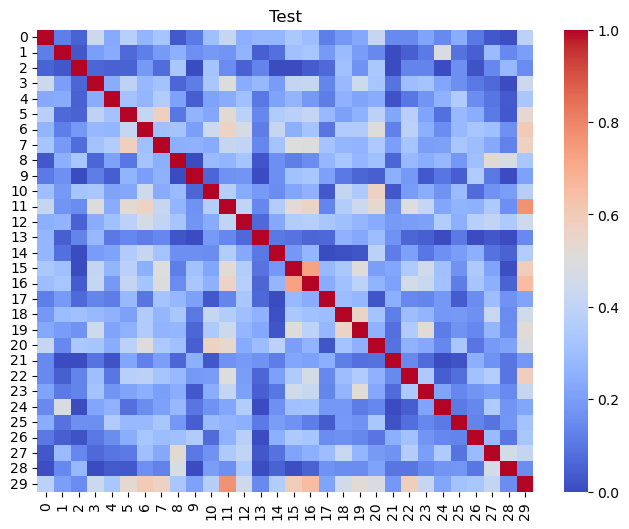

In [5]:
print(random_data.get_intervals().shape[0])
distance_matrix = IntervalMetrics.pairwise_similarity(random_data.get_intervals(),"jaccard")

print(distance_matrix)

plt.figure(figsize=(8, 6))
ClusteringVisualization.draw_heat_map(distance_matrix, ax = None ,cmap = 'coolwarm', annot=False, cbar=True)
plt.title("Test")
plt.show()

In [ ]:
model = IntervalKMeans(n_clusters=4,max_iter=20,tol=1e-4,random_state=42)
model.fit(random_data.get_intervals())

print(model.labels_)

[2 1 0 2 1 2 1 3 3 2 0 2 1 1 3 1 1 3 3 2 1 3 1 2 0 2 3 0 3 1]


In [ ]:
def plot_intervals_3D(intervals, labels=None):
    fig= plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111,projection='3d')
    ClusteringVisualization.draw_3d_interval_cubes(ax, intervals, labels)

    xs = intervals[:, 0, :].ravel()  # x_lower, x_upper
    ys = intervals[:, 1, :].ravel()  # y_lower, y_upper
    zs = intervals[:, 2, :].ravel()  # z_lower, z_upper

    x_min, x_max = xs.min() - 5, xs.max() + 5
    y_min, y_max = ys.min() - 5, ys.max() + 5
    z_min, z_max = zs.min() - 5, zs.max() + 5

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_zlim(z_min, z_max)

    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    ax.set_zlabel("x3")
    ax.set_title("3D")

    plt.show()

def plot_intervals_as_squares(intervals, labels=None):
    fig, ax = plt.subplots(figsize=(6,6))
    ClusteringVisualization.draw_interval_squares(ax, intervals, labels)

    min_val = intervals.min() - 1
    max_val = intervals.max() + 1
    ax.set_xlim(min_val, max_val)
    ax.set_ylim(min_val, max_val)
    ax.set_aspect('equal', 'box')
    
    ax.set_xlabel("Coordinate X (lower →)")
    ax.set_ylabel("Coordinate Y (lower →)")
    ax.set_title("1D Intervals as Squares")
    plt.show()

def plot_2d_intervals(intervals, labels=None):
    fig, ax = plt.subplots(figsize=(6, 6))
    
    ClusteringVisualization.draw_interval_rectangles(ax, intervals, labels=labels)
    
    # 根据 intervals 范围调整坐标
    x_vals = intervals[:, 0, :].ravel()  # 所有 x_lower, x_upper
    y_vals = intervals[:, 1, :].ravel()  # 所有 y_lower, y_upper
    x_min, x_max = x_vals.min() - 1, x_vals.max() + 1
    y_min, y_max = y_vals.min() - 1, y_vals.max() + 1
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    
    # 让坐标系的 x,y 单位看起来相等
    ax.set_aspect('equal', 'box')
    
    ax.set_xlabel("X dimension")
    ax.set_ylabel("Y dimension")
    ax.set_title("2D Interval Rectangles")
    plt.show()


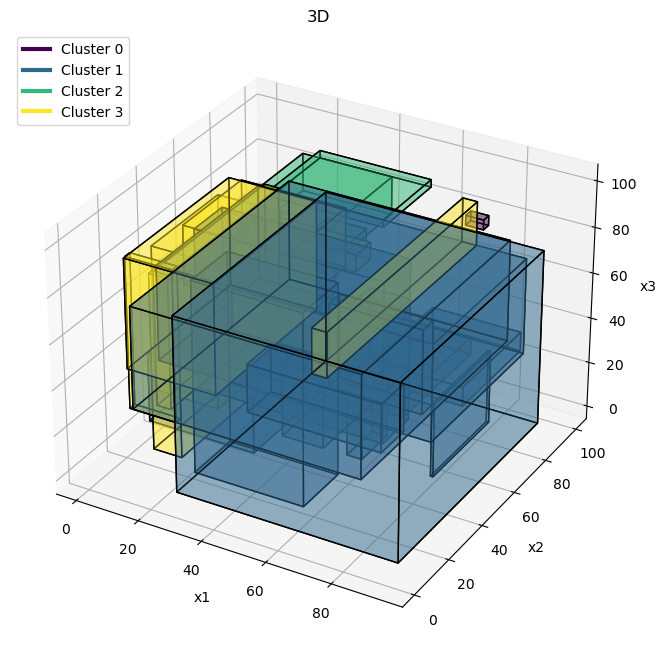

In [ ]:
plot_intervals_3D(random_data.get_intervals(), model.labels_)


 Random Interval Data:
    feature_1_lower  feature_1_upper
0         33.051931        97.823179
1         36.900896        81.255119
2         15.241988        41.789228
3         43.571178        84.159769
4         13.975241        60.879743
5          1.069805         7.252511
6         44.882418        89.883645
7         73.111500        83.799681
8          6.499113        35.706633
9         48.392949        74.984791
10        41.261325        92.883795
11         1.909959        35.510387
12        75.827167        86.244882
13        44.227724        58.106164
14        54.811563        86.469300
15        58.302951        98.986698
16        22.699169        78.652524
17         8.460514        54.751036
18        26.681964        69.878632
19        12.837256        97.734888
20        19.576395        81.333948
21        38.937730        61.022134
22        22.760099        40.254190
23        53.068267        92.318551
24        56.519666        64.787644
25        84.2

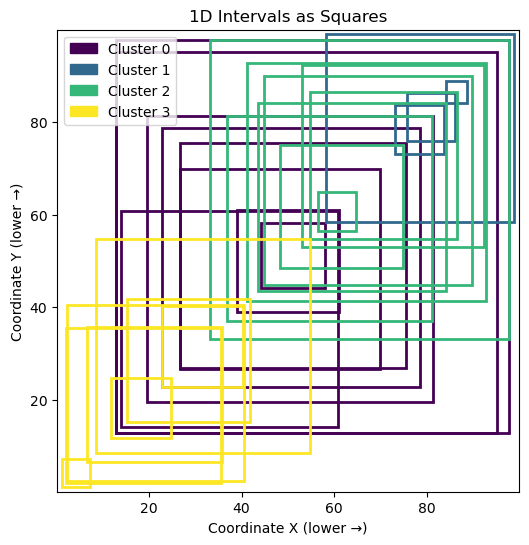

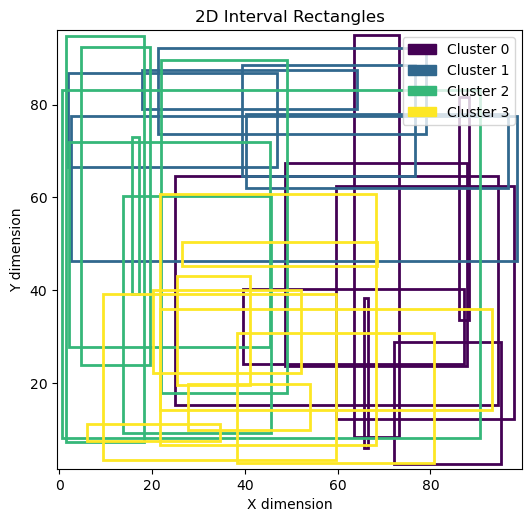

In [ ]:
random_data = IntervalData.random_data(30, 1)
print("\n Random Interval Data:")
print(random_data.data)

model = IntervalKMeans(n_clusters=4,max_iter=20,tol=1e-4,random_state=42)
model.fit(random_data.get_intervals())

plot_intervals_as_squares(random_data.get_intervals(), model.labels_)

random_data = IntervalData.random_data(30, 2)

model = IntervalKMeans(n_clusters=4,max_iter=20,tol=1e-4,random_state=42)
model.fit(random_data.get_intervals())

plot_2d_intervals(random_data.get_intervals(), model.labels_)


 Random Interval Data:
    feature_1_lower  feature_1_upper  feature_2_lower  feature_2_upper
0         64.116355        70.486342        30.860304        85.942771
1          3.988879        89.860909        40.218940        64.365061
2         27.173876        69.725749        43.970732        96.393758
3         61.733554        80.090287        40.488415        83.559370
4         22.050531        66.348625        28.559062        58.116124
5         58.800897        74.960900        29.137125        46.483952
6         36.351194        53.475437        24.899555        40.951056
7         35.634932        53.784283        52.755539        93.588806
8         18.808751        46.530588        43.479249        93.859432
9         78.951454        95.928712        76.741439        89.558231
10         0.837773        84.582975        55.648439        95.617039
11        65.226476        95.751210         8.675065        52.789732
12         9.643495        95.055334         4.686769

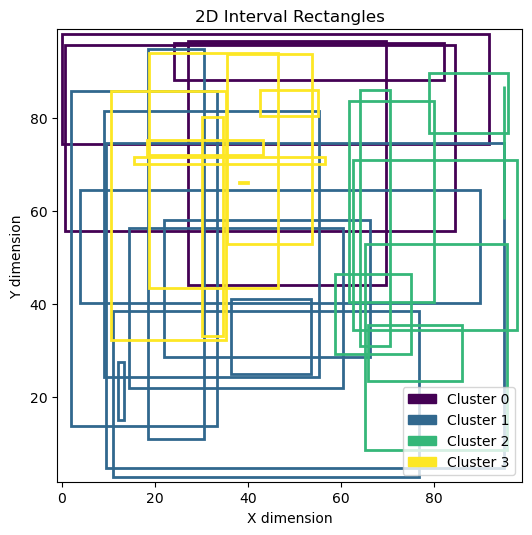

In [ ]:
random_data = IntervalData.random_data(30, 2)
print("\n Random Interval Data:")
print(random_data.data)

model = IntervalKMeans(n_clusters=4,max_iter=20,tol=1e-4,random_state=42)
model.fit(random_data.get_intervals())

plot_2d_intervals(random_data.get_intervals(), model.labels_)